# SEIR model

It’s an acronym for Susceptible, Exposed, Infected, Recovered

The model classifies the population into four mutually exclusive groups: susceptible (at risk of contracting the disease), exposed (infected but not yet infectious), infectious (capable of transmitting the disease), and removed (those who recover or die from the disease). 

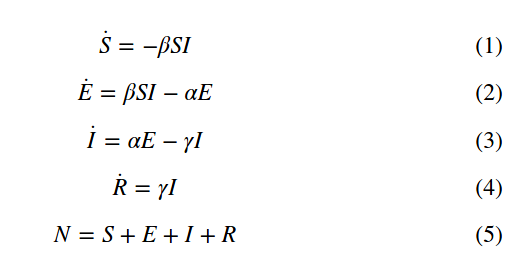

α is the inverse of the incubation period (1/t_incubation)
β is the average contact rate in the population
γ is the inverse of the mean infectious period (1/t_infectious)


The final equation, number (5), is a constraint that indicates there are no birth/migration effects in the model; we have a fixed population from beginning to end.

There’s one more parameter we should discuss, the infamous R0 value.

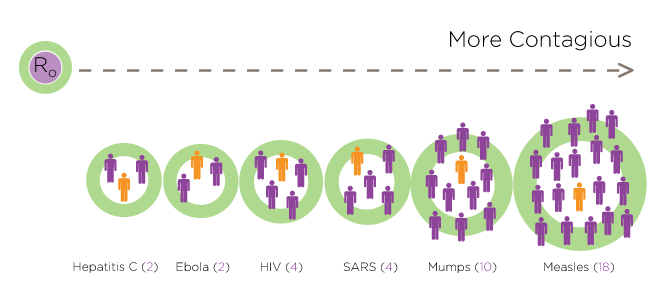

Increasing R0 values indicate more infectious diseases (source: HealthLine.com),
This value defines how quickly the disease spreads and can be related to our parameters through the relationship given in Equation (6).

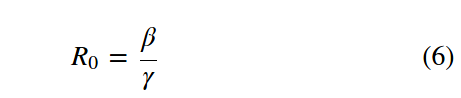

The differential equations describing SIR model were first derived by Kermack and McKendrick [Proc. R. Soc. A, 115, 772 (1927)]:

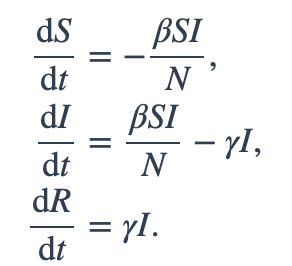

In [1]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline

def base_seir_model(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] - (beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, E, I, R])

In [ ]:
def population_seir_model(init_vals, params, t, N):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] - (beta*S[-1]*I[-1])*dt/N
        next_E = E[-1] + (beta*S[-1]*I[-1]/N - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, E, I, R])